In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import math
from word2number import w2n

In [2]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [9]:
#Data preprocessing
df.experience= df.experience.fillna('zero')
df.experience=df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [12]:
median_test = math.floor(df['test_score(out of 10)'].mean())
median_test

7

In [15]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [16]:
reg =linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df[['salary($)']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
reg.predict([[2,9,6]])

array([[53713.86677124]])

In [19]:
reg.predict([[12,10,10]])

array([[93747.79628651]])

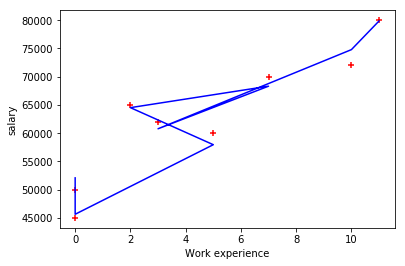

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('Work experience')
plt.ylabel('salary')
plt.scatter(df.experience,df[['salary($)']],marker='+', color='red')
plt.plot(df.experience,reg.predict(df[['experience','test_score(out of 10)','interview_score(out of 10)']]),color='blue')